In [1]:
#Loading the iris dataset
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
#Print the label species
print(iris.target_names)

#Print the names of 4 features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
#print the iris data
print(iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [5]:
#print the iris labels
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

For model building, first convert numpy arrays to dataframe

In [8]:
# Creating a dataset for iris data
import pandas as pd
data = pd.DataFrame({
    'sepal_length':iris.data[:,0],
    'sepal_width':iris.data[:,1],
    'petal_length':iris.data[:,2],
    'petal_width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
x = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

In [12]:
# Splitting into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [14]:
# Import random forest model

from sklearn.ensemble import RandomForestClassifier

#Create Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)

#Train the model using training sets y_pred = clf.predict(X_test)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [15]:
#import sckit learn metrics module for performance metrics
from sklearn import metrics

#Building the confusion matrix
metrics.confusion_matrix(y_test, y_pred)


array([[14,  0,  0],
       [ 0, 15,  2],
       [ 0,  1, 13]])

The confusion matrix is a 3x3 matrix since there are three classes. The classes are represented in the rows and columns of the matrix. The actual classes are represented by the rows, and the predicted classes are represented by the columns. The diagonal of the matrix shows the number of correctly classified instances for each class, while the off-diagonal elements show the misclassified instances.

From the confusion matrix output, we can see that the model predicted all instances of the first class correctly (14 true positives), but misclassified 3 instances of the second and third classes (2 false positives for the second class and 1 false positive for the third class). It correctly classified 15 instances of the second class, but misclassified 1 instance as the third class (1 false negative). Similarly, it correctly classified 13 instances of the third class, but misclassified 1 instance as the second class (1 false negative).

In [16]:
#gETTING THE ACCURACY SCORE
metrics.accuracy_score(y_test, y_pred)

0.9333333333333333

In [18]:
#Making predictions for a single item
clf.predict([[3,5,4,2]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [20]:
#Finding important features
import pandas as pd

feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.486571
petal width (cm)     0.392346
sepal length (cm)    0.101699
sepal width (cm)     0.019384
dtype: float64

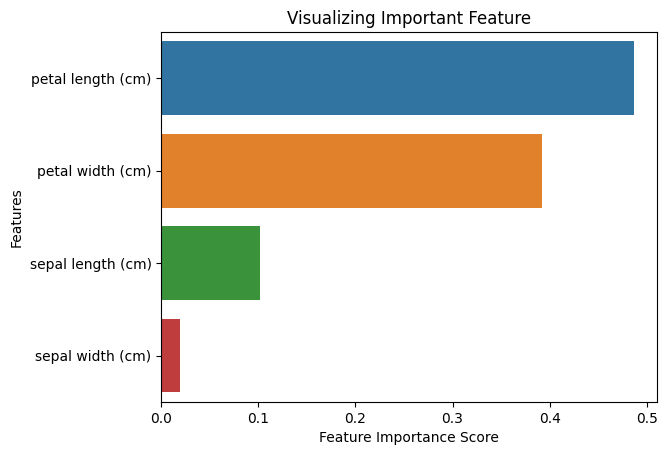

In [22]:
#Visualising feature importance

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

#Add labels to your bar graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Feature')
plt.show()


The most important feature when we build a model are petal length and petal width. We further consider only these 2 feature to build the model.

In [23]:
#Generating model on selected features

#Import train_test_split function
from sklearn.model_selection import train_test_split

#Split dataset into features and labels
x = data[['petal_length', 'petal_width']]
y = data['species']

#Split data into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.70, random_state=5)

In [24]:
# Import random forest model

from sklearn.ensemble import RandomForestClassifier

#Create Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)

#Train the model using training sets y_pred = clf.predict(X_test)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [25]:
#Building the confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[34,  0,  0],
       [ 0, 37,  2],
       [ 0,  3, 29]])

In [26]:
#gETTING THE ACCURACY SCORE
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9523809523809523


It can be seen that by including all the features, the accuracy is 93% but when we exclude the not-so-important features and build the model, the accuracy is 95%. It can be concluded that the optimum accuracy can be gained by not including the unimportant features.